### Step 0: Imports and Reading Data

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [307]:
cab = pd.read_csv('Cab_Data.csv')
transactions = pd.read_csv('Transaction_ID.csv')
customers = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')
holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')

### Step 1: Data Understanding
* Dataframe shape
* head and tail
* dtypes

In [308]:
cab.shape

(359392, 7)

In [309]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [310]:
cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [311]:
transactions.shape

(440098, 3)

In [312]:
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [313]:
transactions.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [314]:
transactions['Transaction ID'].isin(cab['Transaction ID']).sum()

359392

In [315]:
transactions.loc[~transactions['Transaction ID']\
                 .isin(cab['Transaction ID'])]\
                 .shape

(80706, 3)

In [316]:
customers.shape

(49171, 4)

In [317]:
customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [318]:
customers.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [319]:
customers['Customer ID'].isin(transactions['Customer ID']).sum()

49171

In [320]:
city.shape

(20, 3)

In [321]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [322]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [323]:
holidays.shape

(342, 6)

In [324]:
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [325]:
holidays.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

### Step 2: Data Preperation
* Merging data into a single dataframe
* Identifying duplicated columns
* Identifying missing data

In [326]:
df = cab.merge(transactions, on='Transaction ID')\
        .merge(customers, on='Customer ID')

In [327]:
df.shape

(359392, 12)

In [328]:
df.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [329]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], 
                                       unit='D', 
                                       origin=pd.Timestamp('1899-12-30'))

In [330]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [331]:
df.loc[df.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


In [332]:
df.loc[df.duplicated(subset=['Transaction ID'])]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


In [333]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [334]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [335]:
city['Population'] = city['Population'] \
                    .apply(lambda row: row.replace(',',''))
city['Population'] = city['Population'].astype('int')

city['Users'] = city['Users'] \
                    .apply(lambda row: row.replace(',',''))
city['Users'] = city['Users'].astype('int')

In [336]:
city.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [337]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [338]:
holidays['Date'] = pd.to_datetime(holidays['Date'])

In [339]:
holidays.dtypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object

In [340]:
holidays.drop(['Month', 'Day', 'Year'], axis=1, inplace=True)

In [341]:
holidays.head()

,Date,Holiday,WeekDay
0,2004-07-04,4th of July,Sunday
1,2005-07-04,4th of July,Monday
2,2006-07-04,4th of July,Tuesday
3,2007-07-04,4th of July,Wednesday
4,2008-07-04,4th of July,Friday


### Step 3: Feature Understanding
(Univariate analysis)

* Plotting Feature Distributions

In [342]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Distance (KM)')

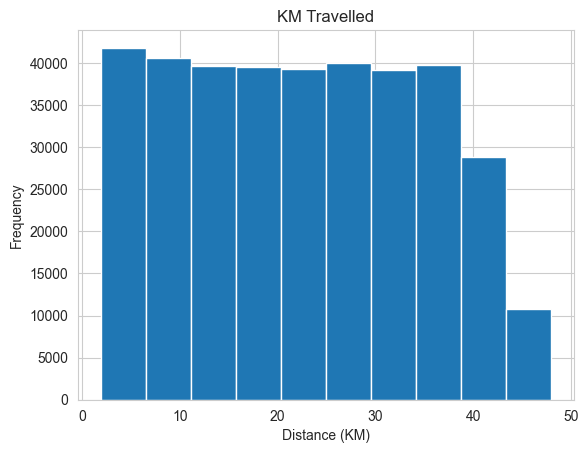

In [343]:
ax = df['KM Travelled'].plot(kind='hist',
                        title='KM Travelled')
ax.set_xlabel('Distance (KM)')

Text(0.5, 0, 'Price')

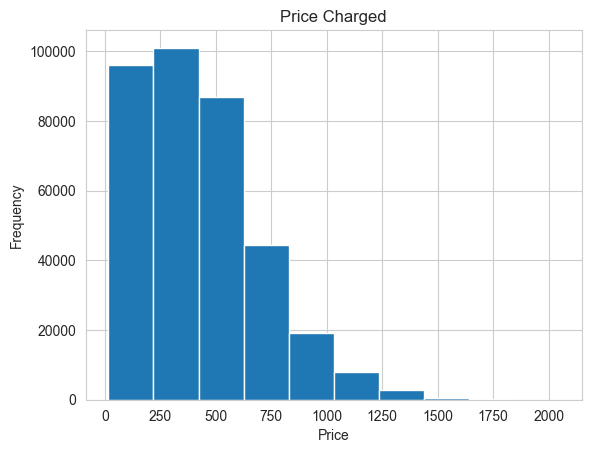

In [344]:
ax = df['Price Charged'].plot(kind='hist',
                              title='Price Charged')
ax.set_xlabel('Price')

Text(0.5, 0, 'Cost')

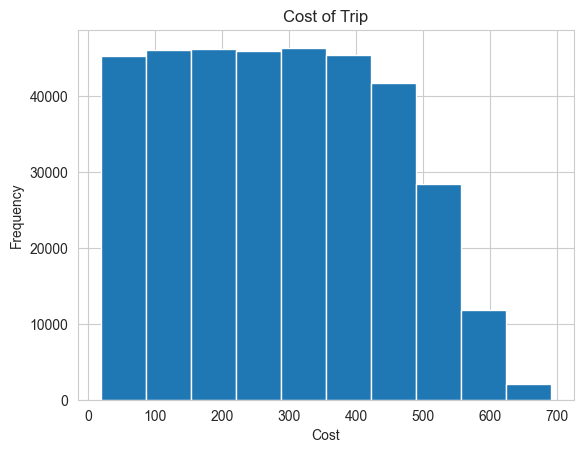

In [345]:
ax = df['Cost of Trip'].plot(kind='hist',
                             title='Cost of Trip')
ax.set_xlabel('Cost')

Text(0.5, 0, 'Income (USD/Month)')

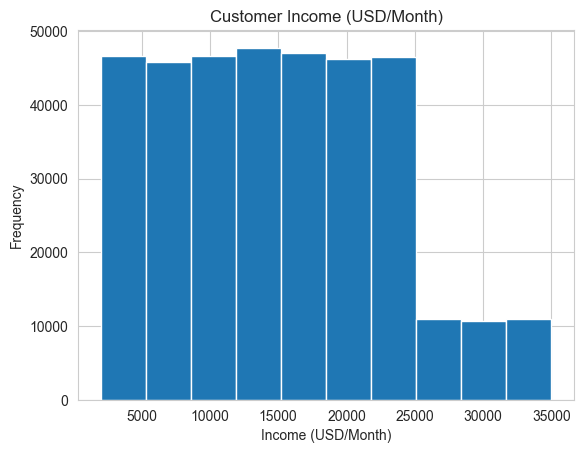

In [346]:
ax = df['Income (USD/Month)'].plot(kind='hist',
                                   title='Customer Income (USD/Month)')
ax.set_xlabel('Income (USD/Month)')

Text(0.5, 0, 'Age')

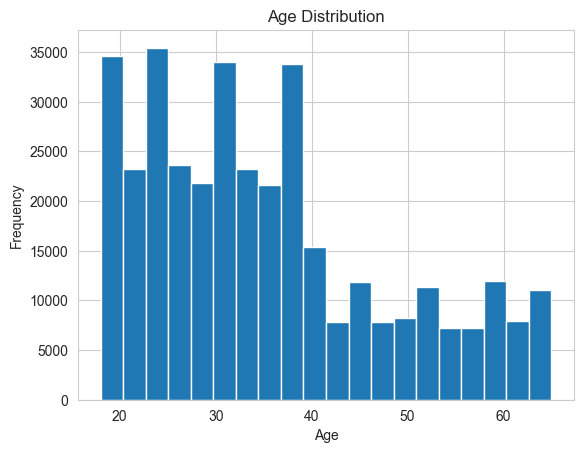

In [347]:
ax = df['Age'].plot(kind='hist',
                    title='Age Distribution',
                    bins=20)
ax.set_xlabel('Age')

### Step 4: Feature Relationships
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


<Axes: xlabel='KM Travelled', ylabel='Cost of Trip'>

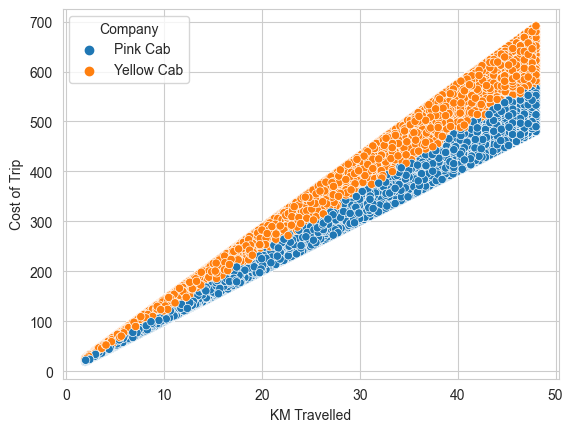

In [349]:
sns.scatterplot(data=df, x='KM Travelled', y='Cost of Trip', hue='Company')

Text(0, 0.5, 'Income (USD/Month)')

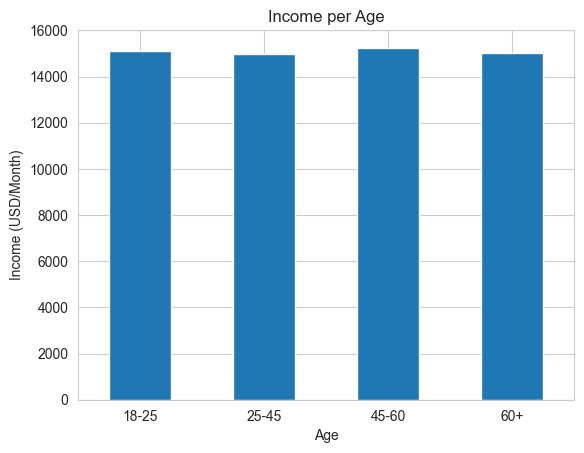

In [350]:
age_groups = pd.cut(df['Age'], right=True, bins=(18, 25, 45, 60, 65))

ax = df.groupby(age_groups)['Income (USD/Month)'].mean().plot(kind='bar',
                                                              title='Income per Age')                                                                                                        
ax.set_xticklabels(['18-25', '25-45', '45-60', '60+'], rotation=0)
ax.set_ylabel('Income (USD/Month)')

In [351]:
df_corr = df.dropna().corr()
df_corr

C:\Users\Daria\AppData\Local\Temp\ipykernel_17712\504565667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.dropna().corr()


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


<Axes: >

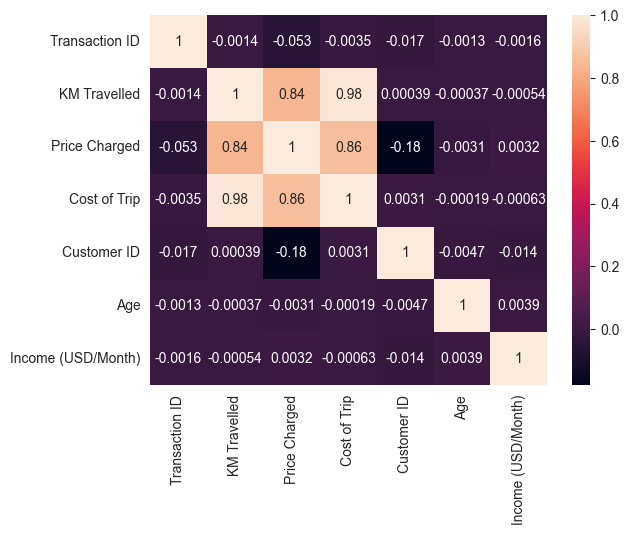

In [352]:
sns.heatmap(df_corr, annot=True)

### Step 5: Hypothesis

#### 1. Cities with higher populations have more cab users.

Text(0.5, 0, 'Population (MM)')

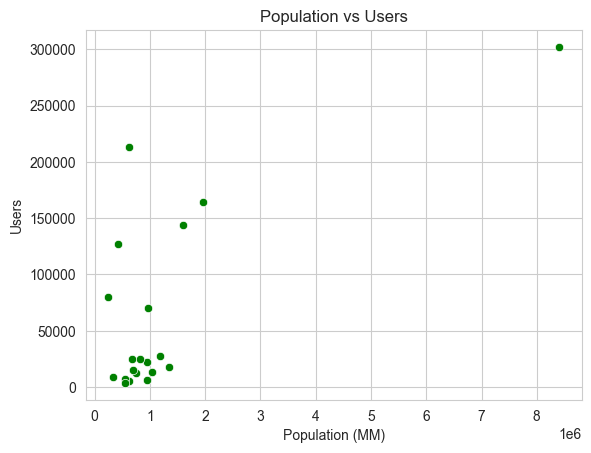

In [353]:
ax = sns.scatterplot(x='Population', y='Users', data=city, color='green')

plt.title('Population vs Users')
plt.xlabel('Population (MM)')

#### 2. Customers in higher income brackets are more likely to use premium cab services.

Calculate the average price charged for each cab company. Create boxplots for each income bracket to see if there is a difference in average price charged between income brackets.

In [354]:
# Calculate the average price charged for each cab company
df.groupby('Company')['Price Charged'].mean()

Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64

In [355]:
# Classify the cab services as Premium or Regular depending on 
# the price charged compared to the average service's price.
def assign_cat(row):
    if row['Company'] == 'Pink Cab':
        if row['Price Charged'] > 311:
            return 'Premium'
        else:
            return 'Regular'
    else:
        if row['Price Charged'] > 458:
            return 'Premium'
        else:
            return 'Regular'

In [356]:
df['Service Type'] = df.apply(lambda r: assign_cat(r), axis=1)

In [357]:
# Create a new column in the data frame with income bins
df['Income Status'] = pd.cut(df['Income (USD/Month)'], 
                             bins=3, 
                             include_lowest=True,
                             labels=['Low', 'Medium', 'High']) 

Text(0.5, 1.0, 'Income Status vs Price Charged')

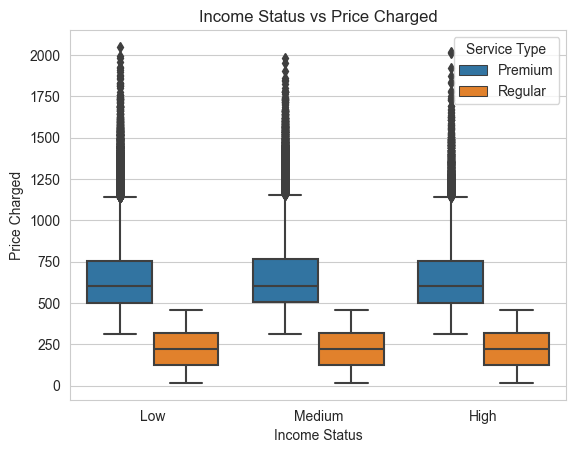

In [358]:
sns.boxplot(x='Income Status', y='Price Charged', hue='Service Type', data=df)

plt.title('Income Status vs Price Charged')

#### 3. Cab usage varies by day of the week.

Create a bar chart of the total number of cab trips for each day of the week.

In [359]:
# Create a new column for the day of the week
df['day_of_week'] = df['Date of Travel'].dt.day_name()

In [360]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df.groupby('day_of_week')['Transaction ID'].count().reindex(cats).reset_index()

Text(0, 0.5, '№ of cab trips')

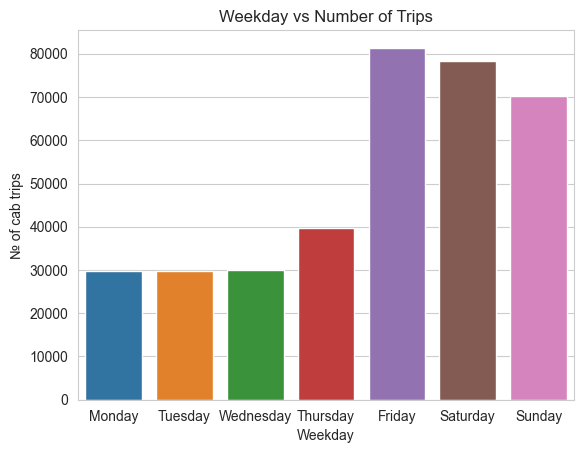

In [361]:
sns.barplot(data=day_counts, x='day_of_week', y='Transaction ID')

plt.title('Weekday vs Number of Trips')
plt.xlabel('Weekday')
plt.ylabel('№ of cab trips')

#### 4. Younger customers tend to take shorter cab rides compared to older customers.

Text(0, 0.5, 'Distance (km)')

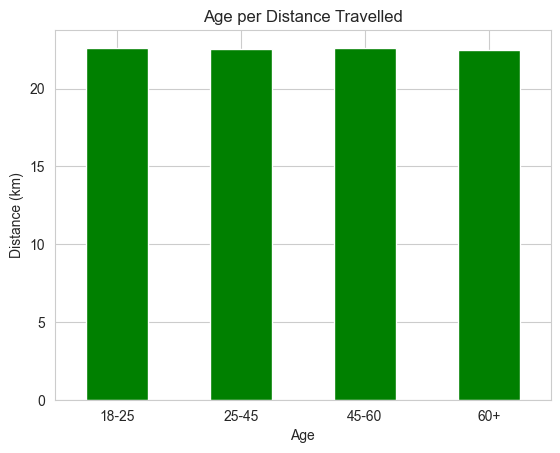

In [362]:
age_groups = pd.cut(df['Age'], right=True, bins=(18, 25, 45, 60, 65))

ax = df.groupby(age_groups)['KM Travelled'].mean().plot(kind='bar',
                                                        title='Age per Distance Travelled',
                                                        color='green')                                                                                                        
ax.set_xticklabels(['18-25', '25-45', '45-60', '60+'], rotation=0)
ax.set_ylabel('Distance (km)')

#### 5. People of what age use cab services more frequently?

Text(0, 0.5, 'Count')

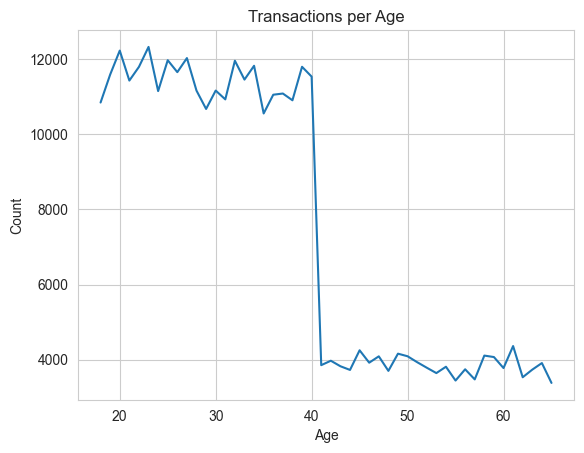

In [363]:
ax = df.groupby('Age')['Transaction ID'].count() \
    .plot(kind='line',
          title='Transactions per Age')

ax.set_ylabel('Count')

#### 6. What are the top 10 cities with the most transactions?

Text(0, 0.5, 'Count')

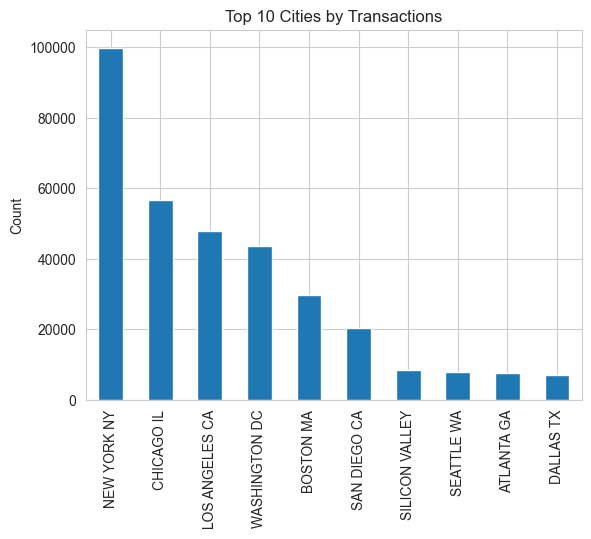

In [364]:
ax = df['City'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top 10 Cities by Transactions')
ax.set_ylabel('Count')

#### 7. The company that charges higher fares also incurs higher costs per trip.

Text(0, 0.5, 'Price (USD)')

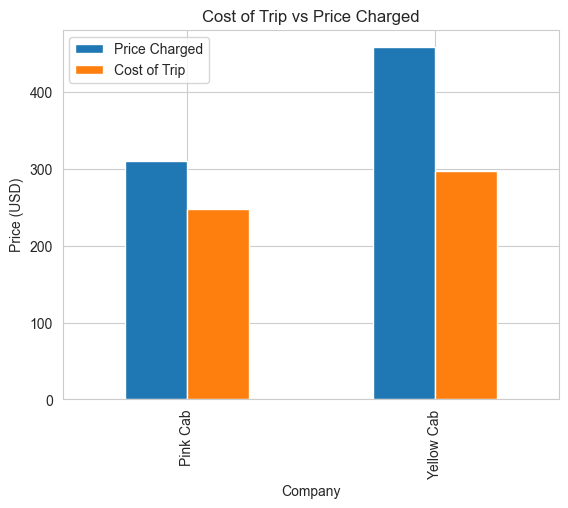

In [365]:
# Group the data by company and calculate the mean price charged and mean cost of trip
grouped_data = df.groupby('Company')\
    .agg({'Price Charged': 'mean', 'Cost of Trip': 'mean'})

# Plot the mean price charged and mean cost of trip for each company
grouped_data.plot(kind='bar', 
                  title='Cost of Trip vs Price Charged')
plt.ylabel('Price (USD)')

#### 8. The average fare charged for a cab ride varies significantly between different cities.

Text(0.5, 1.0, 'Fare charged per City')

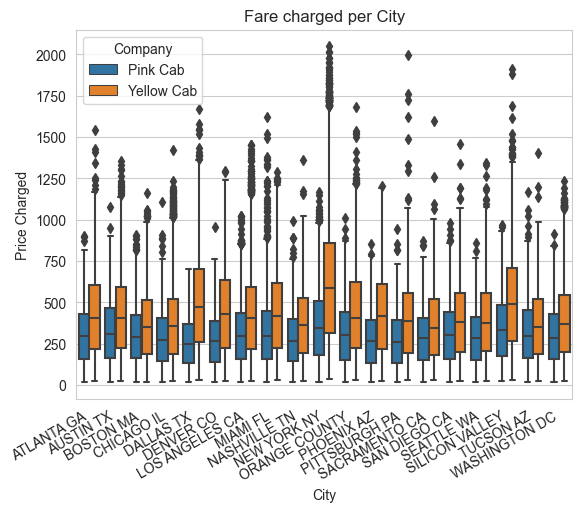

In [366]:
ax = sns.boxplot(x='City', y='Price Charged', hue='Company', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, fontdict={'horizontalalignment':'right'})

plt.title('Fare charged per City')

#### 9. Is there any seasonality in number of customers using the cab service?

Text(0.5, 1.0, 'Cab Service Usage Seasonality')

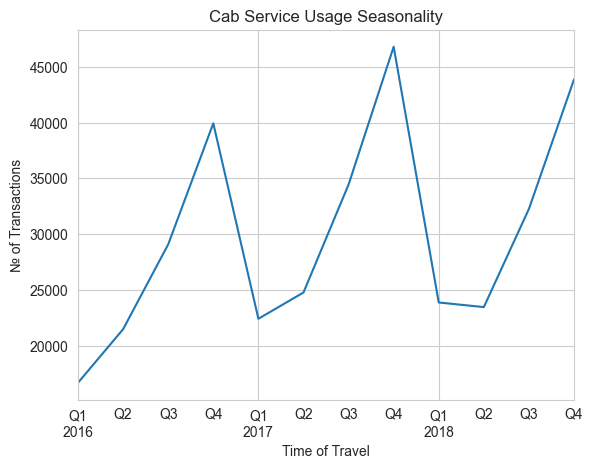

In [367]:
# set the Date column as the index
quarterly_data = df.set_index('Date of Travel')

# group the data by quarters and sum the values
ax = quarterly_data.resample('Q')['Transaction ID'].count()\
    .plot()

plt.xlabel('Time of Travel')
plt.ylabel('№ of Transactions')
plt.title('Cab Service Usage Seasonality')

### Step 6: Profit Analysis

In [368]:
df.drop(['Service Type', 'Income Status', 'day_of_week'], 
        axis=1, 
        inplace=True)

In [369]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

In [370]:
pink_cab = df.loc[df['Company']=='Pink Cab'].copy()
yellow_cab = df.loc[df['Company']=='Yellow Cab'].copy()

#### Total profit

In [371]:
yellow_net_income = yellow_cab['Profit'].sum()
pink_net_income = pink_cab['Profit'].sum()

profit_diff = ((yellow_net_income - pink_net_income) / 
                          pink_net_income) * 100
print(f'Pink Cab generated Profit {pink_net_income:.2f}\nYellow Cab generated Profit {yellow_net_income:.2f}\nYellow Cab generated {profit_diff:.2f}% more profit than Pink Cab.')

Pink Cab generated Profit 5307328.32
Yellow Cab generated Profit 44020373.17
Yellow Cab generated 729.43% more profit than Pink Cab.


#### Annual Profit

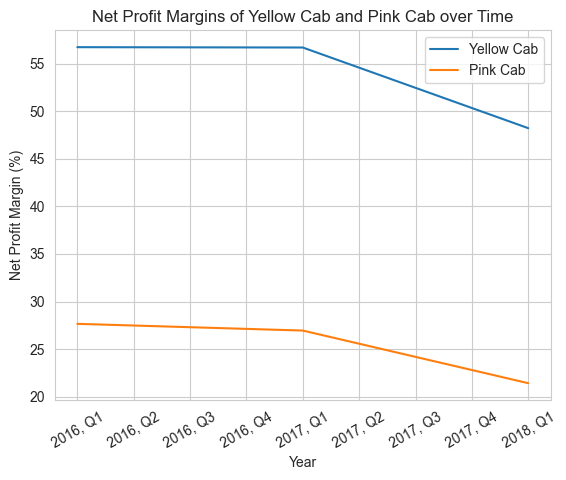

In [372]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total revenue and expenses for each company by year
yellow_cab_revenue = yellow_cab.groupby(pd.Grouper(key='Date of Travel', freq='Y'))['Profit'].sum()
yellow_cab_expenses = yellow_cab.groupby(pd.Grouper(key='Date of Travel', freq='Y'))['Cost of Trip'].sum()
pink_cab_revenue = pink_cab.groupby(pd.Grouper(key='Date of Travel', freq='Y'))['Profit'].sum()
pink_cab_expenses = pink_cab.groupby(pd.Grouper(key='Date of Travel', freq='Y'))['Cost of Trip'].sum()

# Calculate profit margins for each company by year
yellow_cab_profit_margin = (yellow_cab_revenue / yellow_cab_expenses) * 100
pink_cab_profit_margin = (pink_cab_revenue / pink_cab_expenses) * 100

# Plot the profit margins over time
fig, ax = plt.subplots()
ax.plot(yellow_cab_profit_margin.index.year, yellow_cab_profit_margin, label='Yellow Cab')
ax.plot(pink_cab_profit_margin.index.year, pink_cab_profit_margin, label='Pink Cab')
ax.set_xticks([2016.00, 2016.25, 2016.50, 2016.75, 2017.00, 2017.25, 2017.50, 2017.75, 2018.00])
ax.set_xticklabels(['2016, Q1', '2016, Q2', '2016, Q3', '2016, Q4', '2017, Q1', '2017, Q2', '2017, Q3', '2017, Q4', '2018, Q1'], rotation=30)
ax.set_xlabel('Year')
ax.set_ylabel('Net Profit Margin (%)')
ax.set_title('Net Profit Margins of Yellow Cab and Pink Cab over Time')
ax.legend()
plt.show()


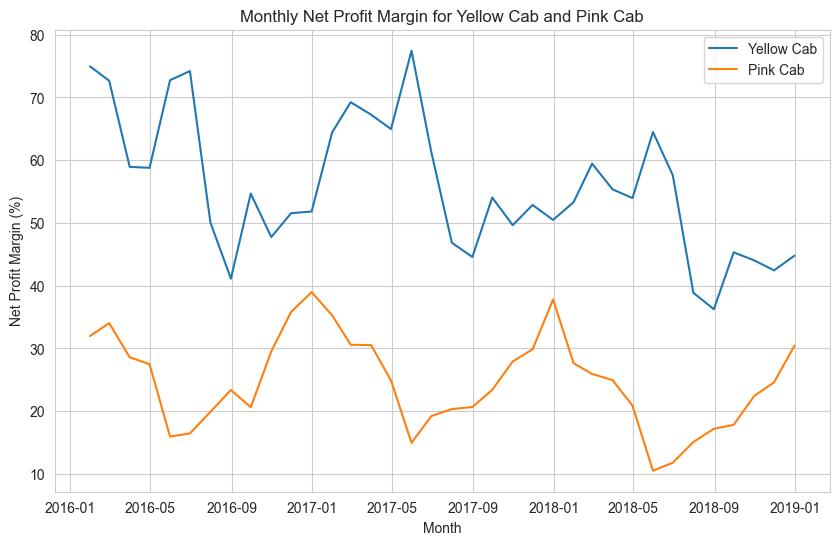

In [373]:
# Calculate monthly net profit and revenue for each company
yellow_cab_monthly_revenue = yellow_cab.groupby(pd.Grouper(key='Date of Travel', freq='M'))['Profit'].sum()
yellow_cab_monthly_expenses = yellow_cab.groupby(pd.Grouper(key='Date of Travel', freq='M'))['Cost of Trip'].sum()
pink_cab_monthly_revenue = pink_cab.groupby(pd.Grouper(key='Date of Travel', freq='M'))['Profit'].sum()
pink_cab_monthly_expenses = pink_cab.groupby(pd.Grouper(key='Date of Travel', freq='M'))['Cost of Trip'].sum()

# Calculate monthly net profit margin for each company
yellow_cab_monthly_margin = (yellow_cab_monthly_revenue / yellow_cab_monthly_expenses) * 100
pink_cab_monthly_margin = (pink_cab_monthly_revenue / pink_cab_monthly_expenses) * 100

# Plot monthly net profit margins for each company
plt.figure(figsize=(10,6))
plt.plot(yellow_cab_monthly_margin, label='Yellow Cab')
plt.plot(pink_cab_monthly_margin, label='Pink Cab')
plt.xlabel('Month')
plt.ylabel('Net Profit Margin (%)')
plt.title('Monthly Net Profit Margin for Yellow Cab and Pink Cab')
plt.legend()
plt.show()

In [374]:
print('The average monthly profit of Yellow Cab Company is', 
      round(yellow_cab_monthly_revenue.mean(),1),"and it's std deviation is",
      round(yellow_cab_monthly_revenue.std(),2), 'so, the percentage of the deviation is', 
      round((yellow_cab_monthly_revenue.std() / yellow_cab_monthly_revenue.mean())*100, 2),'%')

print('The average monthly profit of Pink Cab Company is', 
      round(pink_cab_monthly_revenue.mean(),1),"and it's std deviation is",
      round(pink_cab_monthly_revenue.std(),2), 'so, the percentage of the deviation is', 
      round((pink_cab_monthly_revenue.std() / pink_cab_monthly_revenue.mean())*100, 2),'%')

The average monthly profit of Yellow Cab Company is 1222788.1 and it's std deviation is 282089.04 so, the percentage of the deviation is 23.07 %
The average monthly profit of Pink Cab Company is 147425.8 and it's std deviation is 90063.97 so, the percentage of the deviation is 61.09 %


We can see that over the months, Yellow Cab Company's earnings are more stable with fluctuations of 23.08% while PinkCab Company's earnings vary with fluctuations of 61.22%.

In [375]:
# Calculate the total number of rides for each company per month
yellow_cab_monthly_rides = yellow_cab.groupby(
    pd.Grouper(key='Date of Travel', freq='M'))['Transaction ID'].count()
pink_cab_monthly_rides = pink_cab.groupby(
    pd.Grouper(key='Date of Travel', freq='M'))['Transaction ID'].count()

# Calculate the total distance covered by each company per month
yellow_cab_monthly_distance = yellow_cab.groupby(
    pd.Grouper(key='Date of Travel', freq='M'))['KM Travelled'].sum()
pink_cab_monthly_distance = pink_cab.groupby(
    pd.Grouper(key='Date of Travel', freq='M'))['KM Travelled'].sum()

In [376]:
# Calculate the monthly profit per ride for each company
yellow_cab_monthly_profit_per_ride = yellow_cab_monthly_revenue / yellow_cab_monthly_rides
pink_cab_monthly_profit_per_ride = pink_cab_monthly_revenue / pink_cab_monthly_rides

# Calculate the monthly profit per km for each company
yellow_cab_monthly_profit_per_km = yellow_cab_monthly_revenue / yellow_cab_monthly_distance
pink_cab_monthly_profit_per_km = pink_cab_monthly_revenue / pink_cab_monthly_distance

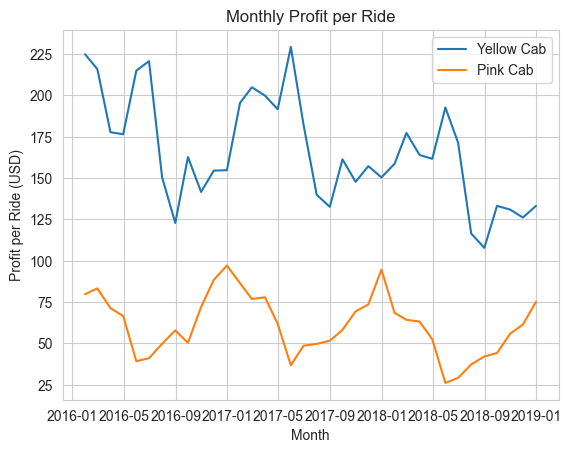

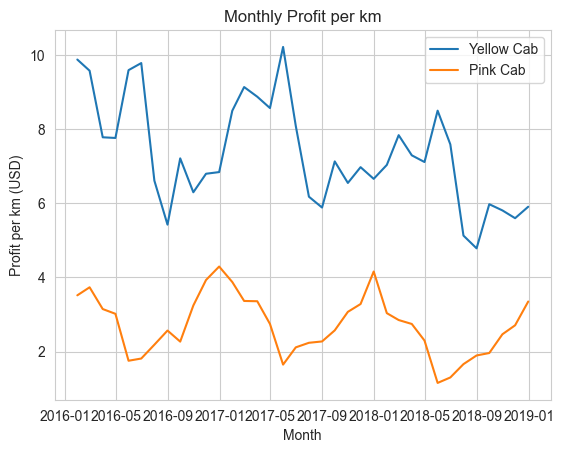

In [377]:
# Plot monthly profit per ride for each company
plt.plot(yellow_cab_monthly_profit_per_ride.index, 
         yellow_cab_monthly_profit_per_ride, 
         label='Yellow Cab')
plt.plot(pink_cab_monthly_profit_per_ride.index, 
         pink_cab_monthly_profit_per_ride, 
         label='Pink Cab')
plt.title('Monthly Profit per Ride')
plt.xlabel('Month')
plt.ylabel('Profit per Ride (USD)')
plt.legend()
plt.show()

# Plot monthly profit per km for each company
plt.plot(yellow_cab_monthly_profit_per_km.index, 
         yellow_cab_monthly_profit_per_km, 
         label='Yellow Cab')
plt.plot(pink_cab_monthly_profit_per_km.index, 
         pink_cab_monthly_profit_per_km, 
         label='Pink Cab')
plt.title('Monthly Profit per km')
plt.xlabel('Month')
plt.ylabel('Profit per km (USD)')
plt.legend()
plt.show()


Holiday Profits

In [378]:
# Mark the holidays
df['isHoliday'] = df['Date of Travel'].isin(holidays['Date'])

In [379]:
df.value_counts()

Transaction ID  Date of Travel  Company     City           KM Travelled  Price Charged  Cost of Trip  Customer ID  Payment_Mode  Gender  Age  Income (USD/Month)  Profit    isHoliday
10000011        2016-01-08      Pink Cab    ATLANTA GA     30.45         370.95         313.6350      29290        Card          Male    28   10813               57.3150   False        1
10292640        2018-01-06      Yellow Cab  SAN DIEGO CA   39.60         1033.12        479.9520      18301        Cash          Female  31   19512               553.1680  False        1
10292648        2018-01-06      Yellow Cab  SAN DIEGO CA   14.70         346.39         183.4560      18693        Cash          Female  27   19493               162.9340  False        1
10292647        2018-01-03      Yellow Cab  SAN DIEGO CA   40.95         890.29         530.7120      18012        Card          Female  37   16106               359.5780  False        1
10292646        2018-01-05      Yellow Cab  SAN DIEGO CA   20.16      

In [380]:
holiday_profit = df.groupby(['Company', 'isHoliday'])['Profit'].mean().reset_index()

In [381]:
holiday_profit

,Company,isHoliday,Profit
0,Pink Cab,False,62.092130
1,Pink Cab,True,72.632423
2,Yellow Cab,False,160.122885
3,Yellow Cab,True,162.785609


Text(0, 0.5, 'Profit (USD)')

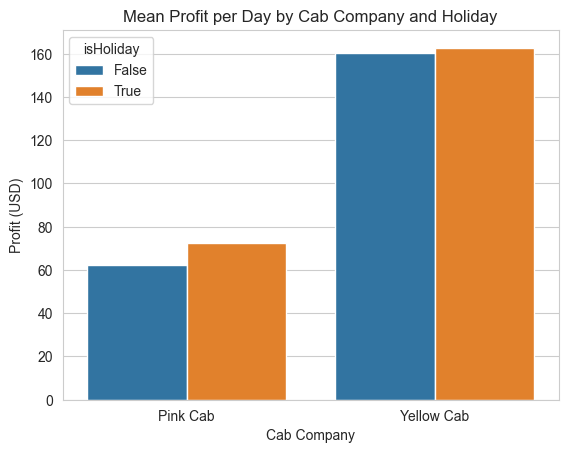

In [382]:
# Create the bar plot
sns.barplot(x='Company', 
            y='Profit', 
            hue='isHoliday', 
            data=holiday_profit)

# Set the title and labels
plt.title('Mean Profit per Day by Cab Company and Holiday')
plt.xlabel('Cab Company')
plt.ylabel('Profit (USD)')

Customers loyalty

In [383]:
grouped = df.groupby(['Company', 'Customer ID']).size().reset_index(name='Rides')

In [384]:
grouped['isLoyal'] = grouped['Rides'] > 3

C:\Users\Daria\AppData\Local\Temp\ipykernel_17712\1040972041.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company',


Text(0, 0.5, 'Customers')

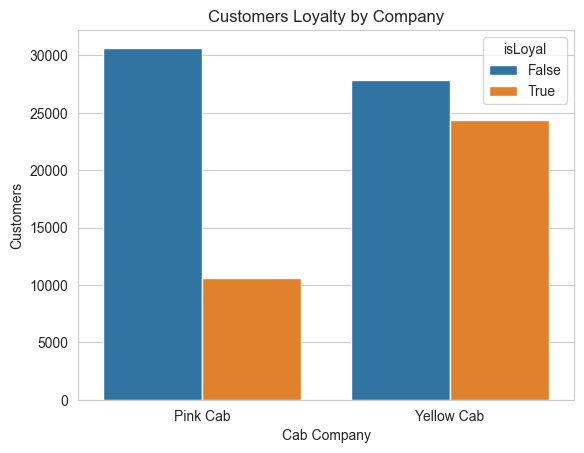

In [385]:
# Create the bar plot
sns.barplot(x='Company', 
            y='Customer ID', 
            hue='isLoyal',
            ci=None,
            data=grouped)

# Set the title and labels
plt.title('Customers Loyalty by Company')
plt.xlabel('Cab Company')
plt.ylabel('Customers')